# Import necessary packages and libraries

In [2]:
import pandas as pd
import numpy as np
from PIL import Image
import cv2
import random
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline

## 60000 images are present in training data
## 10000 images are present in test data

# Preprocessing

Image is of shape 28*28 in given dataset

## In order to perform transfer learning, the image must be scaled to the shape upon which the pre-trained model was trained

We can make use of the ImageDataGenerator API provided by Tensorflow to perform multiple preprocessing steps on the input data, and prepare the data to be fed into the model in batches.

* Rescaling to fit input shape of pretrained model

* Normalize image pixels with mean and standard deviation of ImageNet dataset on which model was trained on

* Perform Data Augmentation such as Random rotation, brigtness, shear, zoom etc.

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [86]:
data_gen = ImageDataGenerator(rescale=1./255, 
                              zoom_range=0.2,
                              width_shift_range=0.2,
                              height_shift_range=0.2,
                              brightness_range = (0.2,0.8),
                              validation_split = 0.2)

In [87]:
test_gen = ImageDataGenerator(rescale = 1./255)

In [88]:
TRAIN_DATA_PATH = "../input/mnist-image/MNIST Dataset JPG format/MNIST - JPG - training"
TEST_DATA_PATH = "../input/mnist-image/MNIST Dataset JPG format/MNIST - JPG - testing"

Using 20% of training data for validation.

In [89]:
train_generator = data_gen.flow_from_directory(TRAIN_DATA_PATH,
                                target_size = (224,224),
                                batch_size=128,
                                shuffle=True,
                                subset='training',
                                seed=42)



Found 48004 images belonging to 10 classes.


In [90]:
valid_generator = data_gen.flow_from_directory(TRAIN_DATA_PATH,
                                target_size = (224,224),
                                batch_size=128,
                                shuffle=True,
                                subset='validation',
                                seed=42)

Found 11996 images belonging to 10 classes.


In [91]:
test_generator = test_gen.flow_from_directory(TEST_DATA_PATH,
                                             target_size = (224, 224),
                                             batch_size = 64,
                                             shuffle=True,
                                             seed = 42)

Found 10000 images belonging to 10 classes.


Access a batch of data from the Image Data Generator

In [92]:
data, labels = next(train_generator)

In [95]:
data[0].shape

(224, 224, 3)

Visualize results of applied preprocessing and augmentation steps

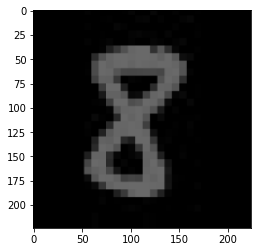

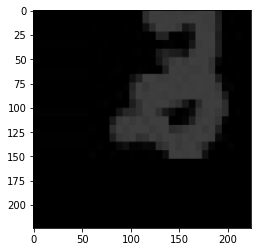

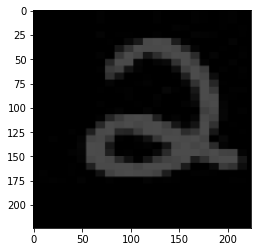

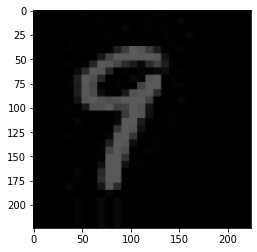

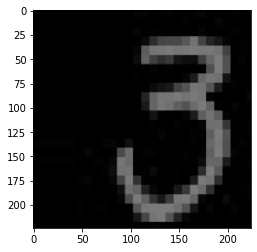

In [93]:
for img in data[:5,:,:,:]:
    plt.imshow(img, cmap='gray')
    plt.show()

As we can observe, the data has been augmented by performing various transformations such as random zoom, random brightness and rotation etc.

The images have been resized to the shape (224, 224, 3) which is appropriate to be used for transfer learning using pre-trained models trained on the ImageNet dataset.